In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set_style('darkgrid')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)  # Ensures that the display width isn't restricted
pd.set_option('display.max_rows', None)

In [3]:
df = pd.read_csv('Network_anomaly_data.csv')
df['is_attack'] = df['attack'].apply(lambda x: 0 if x=='normal' else 1)
df.head()

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,numfailedlogins,loggedin,numcompromised,rootshell,suattempted,numroot,numfilecreations,numshells,numaccessfiles,numoutboundcmds,ishostlogin,isguestlogin,count,srvcount,serrorrate,srvserrorrate,rerrorrate,srvrerrorrate,samesrvrate,diffsrvrate,srvdiffhostrate,dsthostcount,dsthostsrvcount,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,attack,lastflag,is_attack
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20,0
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,0
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19,1
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,0
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,0


In [4]:
scan = set(['ipsweep', 'portsweep', 'nmap', 'satan'])
dos = set(['neptune', 'smurf', 'pod', 'teardrop', 'land'])
access = set(['guess_passwd', 'ftp_write', 'imap', 'phf', 'multihop', 'warezclient', 'warezmaster'])
exploit = set(['buffer_overflow', 'loadmodule', 'rootkit', 'perl'])
backdoor = set(['back','spy'])

df['attack_category'] = None

for i in range(len(df)):
  attk = df.loc[i,'attack']
  if attk in scan:
    df.loc[i,'attack_category'] = 'scan'
  elif attk in dos:
    df.loc[i,'attack_category'] = 'dos'
  elif attk in access:
    df.loc[i,'attack_category'] = 'access'
  elif attk in exploit:
    df.loc[i,'attack_category'] = 'exploit'
  elif attk in backdoor:
    df.loc[i,'attack_category'] = 'backdoor'
  else:
    df.loc[i,'attack_category'] = 'normal'

In [5]:
# land, wrongfragment,urgent, numfailedlogins,loggedin,rootshell,suattempted,numshells,ishostlogin,isguestlogin
df['land'] = df['land'].astype('category')
df['wrongfragment'] = df['wrongfragment'].astype('category')
df['urgent'] = df['urgent'].astype('category')
#df['numfailedlogins'] = df['numfailedlogins'].astype('category')
df['loggedin'] = df['loggedin'].astype('category')
df['rootshell'] = df['rootshell'].astype('category')
df['suattempted'] = df['suattempted'].astype('category')
df['numshells'] = df['numshells'].astype('category')
df['ishostlogin'] = df['ishostlogin'].astype('category')
df['isguestlogin'] = df['isguestlogin'].astype('category')

In [6]:
# Host count of flags
df['serror'] = df['count']*df['serrorrate']
df['rerror'] = df['count']*df['rerrorrate']

# Host srv count of flags
df['srvserror'] = df['srvcount']*df['srvrerrorrate']
df['srvrerror'] = df['srvcount']*df['srvserrorrate']

df['samesrv'] = df['count']*df['samesrvrate']
df['diffsrv'] = df['count']*df['diffsrvrate']

# Host count of flags
df['dsthostserror'] = df['dsthostcount']*df['dsthostserrorrate']
df['dsthostrerror'] = df['dsthostcount']*df['dsthostrerrorrate']

# Host srv count of flags
df['dsthostsrvserror'] = df['dsthostsrvcount']*df['dsthostsrvrerrorrate']
df['dsthostsrvrerror'] = df['dsthostsrvcount']*df['dsthostsrvserrorrate']

df['dsthostsamesrv'] = df['dsthostsrvcount']*df['dsthostsamesrvrate']
df['dsthostdiffsrv'] = df['dsthostsrvcount']*df['dsthostdiffsrvrate']

In [7]:
from sklearn.model_selection import train_test_split
all_attacks = df['attack'].unique()

# Step 2: Create a stratified split ensuring that each category is in the test set at least once
train_data = pd.DataFrame()
test_data = pd.DataFrame()

# Split the data by each attack category and ensure they appear in test
for category in all_attacks:
    # Get data for the current category
    category_data = df[df['attack'] == category]
    # Split into train and test, ensuring each category appears in test
    if len(category_data) > 30:
        category_train, category_test = train_test_split(category_data, test_size=0.2,random_state=42)
    else:
        category_train, category_test = train_test_split(category_data, test_size=0.3,random_state=42)
    
    # Append to the train and test sets
    train_data = pd.concat([train_data,category_train])
    test_data = pd.concat([test_data,category_test])

In [8]:
X_train = train_data.drop(['attack','is_attack','attack_category'],axis=1)
y_train = train_data['is_attack']
X_test = test_data.drop(['attack','is_attack','attack_category'],axis=1)
y_test = test_data['is_attack']

In [9]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

categorical_columns = ['protocoltype', 'service', 'flag','land','wrongfragment','urgent','loggedin','rootshell','suattempted','numshells',
                       'ishostlogin','isguestlogin']

encoder = LabelEncoder()
for col in categorical_columns:
    X_train[col] = encoder.fit_transform(X_train[col])
    X_test[col] = encoder.transform(X_test[col])

In [10]:
numerical_columns = X_train.select_dtypes(include=['int64', 'float64']).columns

scaler = StandardScaler()
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

In [11]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42,class_weight='balanced',n_estimators=50,
                            min_samples_split= 5,
                            max_features= 'sqrt',
                            max_depth= 20)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

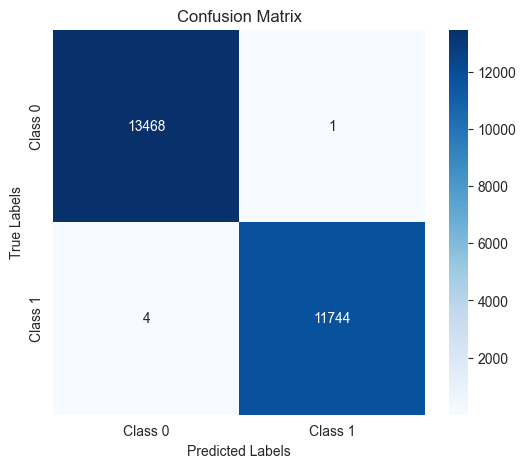

In [12]:
from sklearn.metrics import confusion_matrix

cmrf1 = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cmrf1, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [13]:
y_pred_df = pd.DataFrame(y_pred,index=y_test.index)
y_pred_df.isna().sum()

0    0
dtype: int64

In [14]:
combined_pred = pd.concat([y_test,y_pred_df],axis=1)
combined_pred = pd.merge(combined_pred,test_data['attack'],left_index=True,right_index=True)
combined_pred.columns = ['is_attack','is_attack_pred','attack_name']
predicted_probabilities = rf.predict_proba(X_test)
combined_pred['predict_prob'] = predicted_probabilities[:, 1]
combined_pred.head()

,is_attack,is_attack_pred,attack_name,predict_prob
18091,0,0,normal,0.000000
29741,0,0,normal,0.000000
76709,0,0,normal,0.000000
91928,0,0,normal,0.000000
39962,0,0,normal,0.000113


In [15]:
combined_pred_eq = combined_pred[combined_pred['is_attack'] == combined_pred['is_attack_pred']]
combined_pred_uneq = combined_pred[combined_pred['is_attack'] != combined_pred['is_attack_pred']]
combined_pred_uneq = combined_pred_uneq[combined_pred_uneq['is_attack'] == 1]
combined_pred = pd.concat([combined_pred_eq,combined_pred_uneq],axis=0)
combined_pred.shape

(25216, 4)

In [16]:
op = pd.merge(X_test,combined_pred,left_index=True,right_index=True)
op = pd.merge(op,df[['attack_category','attack']],left_index=True,right_index=True)
op.head()

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,numfailedlogins,loggedin,numcompromised,rootshell,suattempted,numroot,numfilecreations,numshells,numaccessfiles,numoutboundcmds,ishostlogin,isguestlogin,count,srvcount,serrorrate,srvserrorrate,rerrorrate,srvrerrorrate,samesrvrate,diffsrvrate,srvdiffhostrate,dsthostcount,dsthostsrvcount,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,lastflag,serror,rerror,srvserror,srvrerror,samesrv,diffsrv,dsthostserror,dsthostrerror,dsthostsrvserror,dsthostsrvrerror,dsthostsamesrv,dsthostdiffsrv,is_attack,is_attack_pred,attack_name,predict_prob,attack_category,attack
18091,-0.109305,2.223235,-1.176125,0.751241,-0.007738,-0.005283,-0.013734,-0.091207,-0.007562,-0.095585,-0.026347,-0.810543,-0.021071,-0.036629,-0.025421,-0.02124,-0.026064,-0.017503,-0.040154,0.0,-0.00315,-0.097821,0.182986,2.168302,-0.637513,-0.632046,-0.374379,-0.374551,0.770809,-0.349259,-0.336107,0.736012,1.258270,1.066453,-0.438899,-0.479495,-0.288563,-0.639305,-0.624803,-0.387852,-0.376434,-0.657064,-0.54098,-0.25174,-0.242122,-0.503688,1.161676,-0.196049,-0.625478,-0.343032,-0.173354,-0.4188,1.304677,-0.292246,0,0,normal,0.000000,normal,normal
29741,-0.109305,-0.124695,-0.442350,0.751241,-0.007699,-0.002286,-0.013734,-0.091207,-0.007562,-0.095585,-0.026347,1.233741,-0.021071,-0.036629,-0.025421,-0.02124,-0.026064,-0.017503,-0.040154,0.0,-0.00315,-0.097821,-0.585898,-0.148033,-0.637513,-0.632046,-0.374379,-0.374551,0.770809,-0.349259,-0.374609,0.736012,1.258270,1.066453,-0.438899,-0.479495,-0.288563,-0.639305,-0.624803,-0.387852,-0.376434,0.654599,-0.54098,-0.25174,-0.242122,-0.503688,-0.099830,-0.196049,-0.625478,-0.343032,-0.173354,-0.4188,1.304677,-0.292246,0,0,normal,0.000000,normal,normal
76709,-0.109305,2.223235,-1.176125,0.751241,-0.007741,-0.005291,-0.013734,-0.091207,-0.007562,-0.095585,-0.026347,-0.810543,-0.021071,-0.036629,-0.025421,-0.02124,-0.026064,-0.017503,-0.040154,0.0,-0.00315,-0.097821,-0.725695,-0.368637,-0.637513,-0.632046,-0.374379,-0.374551,0.770809,-0.349259,-0.374609,-1.379091,0.734382,1.066453,-0.438899,2.765990,-0.199825,-0.639305,-0.624803,-0.387852,-0.376434,0.654599,-0.54098,-0.25174,-0.242122,-0.503688,-0.329195,-0.196049,-0.625478,-0.343032,-0.173354,-0.4188,0.800650,-0.292246,0,0,normal,0.000000,normal,normal
91928,-0.109305,2.223235,1.086347,0.751241,-0.007729,-0.005278,-0.013734,-0.091207,-0.007562,-0.095585,-0.026347,-0.810543,-0.021071,-0.036629,-0.025421,-0.02124,-0.026064,-0.017503,-0.040154,0.0,-0.00315,-0.097821,-0.673271,-0.368637,-0.637513,-0.632046,-0.374379,-0.374551,-1.185454,1.260520,-0.374609,0.736012,1.204075,1.021894,-0.385956,-0.479495,-0.288563,-0.639305,-0.624803,-0.387852,-0.376434,-0.657064,-0.54098,-0.25174,-0.242122,-0.503688,-0.329482,-0.155957,-0.625478,-0.343032,-0.173354,-0.4188,1.209259,0.212259,0,0,normal,0.000000,normal,normal
39962,-0.098884,2.223235,-1.176125,0.751241,-0.007741,-0.005304,-0.013734,-0.091207,-0.007562,-0.095585,-0.026347,-0.810543,-0.021071,-0.036629,-0.025421,-0.02124,-0.026064,-0.017503,-0.040154,0.0,-0.00315,-0.097821,-0.708221,-0.313486,-0.637513,-0.632046,-0.374379,-0.374551,-0.753256,3.369886,1.165466,-1.207868,-0.755989,-0.002954,-0.174186,-0.414585,-0.288563,-0.639305,-0.624803,-0.387852,-0.376434,0.654599,-0.54098,-0.25174,-0.242122,-0.503688,-0.329338,-0.156352,-0.625478,-0.343032,-0.173354,-0.4188,-0.766698,0.031934,0,0,normal,0.000113,normal,normal


In [17]:
attacks = op[op['is_attack_pred'] == 1].copy()
attacks['attack_category'].value_counts()

attack_category
dos         8998
scan        2333
access       206
backdoor     193
exploit       14
Name: count, dtype: int64

In [18]:
all_attacks1 = attacks['attack'].unique()

# Step 2: Create a stratified split ensuring that each category is in the test set at least once
train1_data = pd.DataFrame()
test1_data = pd.DataFrame()

# Split the data by each attack category and ensure they appear in test
for category in all_attacks1:
    # Get data for the current category
    category_data = attacks[attacks['attack'] == category]
    #print(category)
    # Split into train and test, ensuring each category appears in test
    if len(category_data) > 30:
        category_train, category_test = train_test_split(category_data, test_size=0.2,random_state=42)
    elif len(category_data) == 1:
        train1_data = pd.concat([train1_data,category_data])
    else:
        category_train, category_test = train_test_split(category_data, test_size=0.3,random_state=42)
    
    # Append to the train and test sets
    train1_data = pd.concat([train1_data,category_train])
    test1_data = pd.concat([test1_data,category_test])

In [19]:
X1_train = train1_data.drop(['attack','is_attack','attack_category'],axis=1)
y1_train = train1_data['attack_category']
X1_test = test1_data.drop(['attack','is_attack','attack_category'],axis=1)
y1_test = test1_data['attack_category']

In [20]:
X1_train.drop(['is_attack_pred', 'attack_name', 'predict_prob'],axis=1,inplace=True)
X1_test.drop(['is_attack_pred', 'attack_name', 'predict_prob'],axis=1,inplace=True)

In [21]:
target_encoder = LabelEncoder()
y1_train_encoded = target_encoder.fit_transform(y1_train)
y1_test_encoded = target_encoder.transform(y1_test)

In [22]:
rf2 = RandomForestClassifier(random_state=42,class_weight='balanced',
                             n_estimators= 200,
                            min_samples_split=2,
                            max_features='log2',
                            max_depth=None)
rf2.fit(X1_train,y1_train_encoded)
y_pred1 = rf2.predict(X1_test)

In [23]:
target_classes = [target_encoder.classes_[i] for i in range(len(target_encoder.classes_))]

In [24]:
# from sklearn.model_selection import RandomizedSearchCV


# param_dist = {
#     'n_estimators': [50,100, 150,200],
#     'max_depth': [None, 10, 20,30,40],
#     'min_samples_split': [2, 5, 7,10],
#     'max_features': ['sqrt', 'log2', None]
# }

# rf_model = RandomForestClassifier(random_state=42,class_weight='balanced')

# random_search = RandomizedSearchCV(rf_model, param_distributions=param_dist, 
#                                    n_iter=500, cv=5, scoring='accuracy', 
#                                    n_jobs=-1, random_state=42)
# random_search.fit(X1_train, y1_train_encoded)
# best_clf = random_search.best_estimator_
# y_pred22= best_clf.predict(X1_test)

# cmbest = confusion_matrix(y1_test_encoded, y_pred22)

# plt.figure(figsize=(6, 5))
# sns.heatmap(cmbest, annot=True, fmt='d', cmap='Blues', xticklabels=target_classes, yticklabels=target_classes)
# plt.xlabel('Predicted Labels')
# plt.ylabel('True Labels')
# plt.title('Confusion Matrix')
# plt.show()


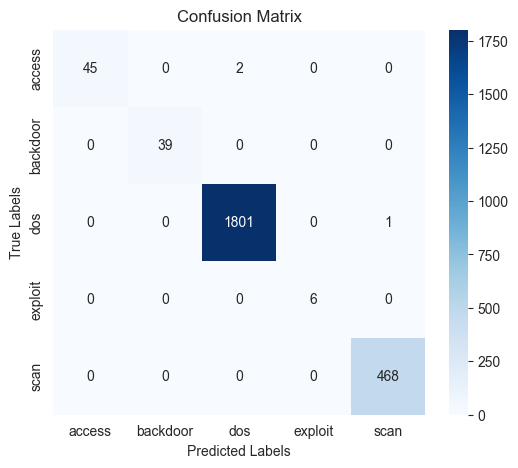

In [25]:
cm1 = confusion_matrix(y1_test_encoded, y_pred1)

plt.figure(figsize=(6, 5))
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues', xticklabels=target_classes, yticklabels=target_classes)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [26]:
from sklearn.metrics import classification_report
print(classification_report(y1_test_encoded, y_pred1))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        47
           1       1.00      1.00      1.00        39
           2       1.00      1.00      1.00      1802
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00       468

    accuracy                           1.00      2362
   macro avg       1.00      0.99      1.00      2362
weighted avg       1.00      1.00      1.00      2362



In [27]:
y1_pred_df = pd.DataFrame(y_pred1,index=y1_test.index)
y1_pred_df.isna().sum()

0    0
dtype: int64

In [28]:
combined_pred1 = pd.concat([y1_test,y1_pred_df],axis=1)
combined_pred1.columns = ['attack_category','attack_category_pred']
predicted_probabilities1 = rf2.predict_proba(X1_test)
combined_pred1['predict_prob'] = predicted_probabilities1[:, 1]

In [29]:
ocategory = dict()
for i in range(len(target_encoder.classes_)):
    ocategory[i] = target_encoder.classes_[i]
ocategory

{0: 'access', 1: 'backdoor', 2: 'dos', 3: 'exploit', 4: 'scan'}

In [30]:
combined_pred1['attack_category_pred'] = combined_pred1['attack_category_pred'].map(ocategory)

In [31]:
combined_pred1[combined_pred1['attack_category_pred'] != combined_pred1['attack_category']]

,attack_category,attack_category_pred,predict_prob
81558,dos,scan,0.060
6086,access,dos,0.010
103765,access,dos,0.045


In [32]:
combined_pred1.shape

(2362, 3)

In [33]:
combined_pred1 = combined_pred1[combined_pred1['attack_category'] == combined_pred1['attack_category_pred']]
combined_pred1.shape

(2359, 3)

In [34]:
op1 = pd.merge(X1_test,combined_pred1,left_index=True,right_index=True)
op1 = pd.merge(op1,df['attack'],left_index=True,right_index=True)
op1.head()

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,numfailedlogins,loggedin,numcompromised,rootshell,suattempted,numroot,numfilecreations,numshells,numaccessfiles,numoutboundcmds,ishostlogin,isguestlogin,count,srvcount,serrorrate,srvserrorrate,rerrorrate,srvrerrorrate,samesrvrate,diffsrvrate,srvdiffhostrate,dsthostcount,dsthostsrvcount,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,lastflag,serror,rerror,srvserror,srvrerror,samesrv,diffsrv,dsthostserror,dsthostrerror,dsthostsrvserror,dsthostsrvrerror,dsthostsamesrv,dsthostdiffsrv,attack_category,attack_category_pred,predict_prob,attack
92447,-0.109305,-0.124695,-1.359568,-1.850971,-0.007746,-0.005311,-0.013734,-0.091207,-0.007562,-0.095585,-0.026347,-0.810543,-0.021071,-0.036629,-0.025421,-0.02124,-0.026064,-0.017503,-0.040154,0.0,-0.00315,-0.097821,1.030505,-0.368637,-0.637513,-0.632046,2.746164,2.713627,-1.503915,0.039308,-0.374609,0.736012,-1.035998,-1.161479,-0.015358,-0.479495,-0.288563,-0.639305,-0.624803,2.873430,2.754351,0.217378,-0.540980,2.927955,0.109282,-0.503688,-0.343530,0.083217,-0.625478,3.321282,-0.138182,-0.418800,-0.911301,-0.276037,dos,dos,0.000,neptune
6373,-0.109305,-0.124695,0.107981,-2.222715,-0.007746,-0.005311,-0.013734,-0.091207,-0.007562,-0.095585,-0.026347,-0.810543,-0.021071,-0.036629,-0.025421,-0.02124,-0.026064,-0.017503,-0.040154,0.0,-0.00315,-0.097821,1.467371,-0.203184,-0.637513,-0.632046,2.746164,2.713627,-1.390179,0.039308,-0.374609,0.736012,-0.927607,-1.050082,-0.068301,-0.479495,-0.288563,-0.639305,-0.624803,2.873430,2.754351,-0.219843,-0.540980,3.715009,4.326126,-0.503688,-0.162906,0.152343,-0.625478,3.321282,0.283880,-0.418800,-0.905653,-0.107869,dos,dos,0.000,neptune
112415,-0.109305,-0.124695,-0.442350,-0.735737,-0.007746,-0.005311,-0.013734,-0.091207,-0.007562,-0.095585,-0.026347,-0.810543,-0.021071,-0.036629,-0.025421,-0.02124,-0.026064,-0.017503,-0.040154,0.0,-0.00315,-0.097821,-0.594636,-0.148033,1.601997,1.470742,-0.374379,-0.189261,0.770809,-0.349259,0.087413,-1.671176,-0.900510,1.066453,-0.438899,-0.284766,-0.288563,1.609084,1.618981,-0.387852,-0.376434,-2.405949,-0.357921,-0.251740,0.116310,2.138320,-0.114166,-0.196049,-0.482343,-0.343032,-0.173354,1.175293,-0.772260,-0.292246,dos,dos,0.015,neptune
15105,-0.109305,-0.124695,-0.686941,-0.735737,-0.007746,-0.005311,-0.013734,-0.091207,-0.007562,-0.095585,-0.026347,-0.810543,-0.021071,-0.036629,-0.025421,-0.02124,-0.026064,-0.017503,-0.040154,0.0,-0.00315,-0.097821,-0.428627,-0.285910,1.534812,1.604962,-0.280762,-0.374551,-1.048970,0.427876,-0.374609,0.736012,-0.792119,-0.916407,-0.174186,-0.479495,-0.288563,1.609084,1.618981,-0.387852,-0.376434,-0.657064,-0.152552,-0.235211,-0.242122,0.653637,-0.243183,-0.099274,1.655734,-0.343032,-0.173354,2.370862,-0.884536,-0.008589,dos,dos,0.000,neptune
87189,-0.109305,-0.124695,1.086347,-0.735737,-0.007746,-0.005311,-0.013734,-0.091207,-0.007562,-0.095585,-0.026347,-0.810543,-0.021071,-0.036629,-0.025421,-0.02124,-0.026064,-0.017503,-0.040154,0.0,-0.00315,-0.097821,1.240201,-0.203184,1.601997,1.604962,-0.374379,-0.374551,-1.367432,-0.016201,-0.374609,0.736012,-1.008900,-1.116920,-0.015358,-0.479495,-0.288563,1.609084,1.618981,-0.387852,-0.376434,0.654599,2.044726,-0.251740,-0.242122,1.645630,-0.149144,0.071762,1.655734,-0.343032,-0.173354,-0.020277,-0.910606,-0.227410,dos,dos,0.000,neptune


In [35]:
final = op1.drop(['attack_category','predict_prob'],axis=1)
final.head()

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,numfailedlogins,loggedin,numcompromised,rootshell,suattempted,numroot,numfilecreations,numshells,numaccessfiles,numoutboundcmds,ishostlogin,isguestlogin,count,srvcount,serrorrate,srvserrorrate,rerrorrate,srvrerrorrate,samesrvrate,diffsrvrate,srvdiffhostrate,dsthostcount,dsthostsrvcount,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,lastflag,serror,rerror,srvserror,srvrerror,samesrv,diffsrv,dsthostserror,dsthostrerror,dsthostsrvserror,dsthostsrvrerror,dsthostsamesrv,dsthostdiffsrv,attack_category_pred,attack
92447,-0.109305,-0.124695,-1.359568,-1.850971,-0.007746,-0.005311,-0.013734,-0.091207,-0.007562,-0.095585,-0.026347,-0.810543,-0.021071,-0.036629,-0.025421,-0.02124,-0.026064,-0.017503,-0.040154,0.0,-0.00315,-0.097821,1.030505,-0.368637,-0.637513,-0.632046,2.746164,2.713627,-1.503915,0.039308,-0.374609,0.736012,-1.035998,-1.161479,-0.015358,-0.479495,-0.288563,-0.639305,-0.624803,2.873430,2.754351,0.217378,-0.540980,2.927955,0.109282,-0.503688,-0.343530,0.083217,-0.625478,3.321282,-0.138182,-0.418800,-0.911301,-0.276037,dos,neptune
6373,-0.109305,-0.124695,0.107981,-2.222715,-0.007746,-0.005311,-0.013734,-0.091207,-0.007562,-0.095585,-0.026347,-0.810543,-0.021071,-0.036629,-0.025421,-0.02124,-0.026064,-0.017503,-0.040154,0.0,-0.00315,-0.097821,1.467371,-0.203184,-0.637513,-0.632046,2.746164,2.713627,-1.390179,0.039308,-0.374609,0.736012,-0.927607,-1.050082,-0.068301,-0.479495,-0.288563,-0.639305,-0.624803,2.873430,2.754351,-0.219843,-0.540980,3.715009,4.326126,-0.503688,-0.162906,0.152343,-0.625478,3.321282,0.283880,-0.418800,-0.905653,-0.107869,dos,neptune
112415,-0.109305,-0.124695,-0.442350,-0.735737,-0.007746,-0.005311,-0.013734,-0.091207,-0.007562,-0.095585,-0.026347,-0.810543,-0.021071,-0.036629,-0.025421,-0.02124,-0.026064,-0.017503,-0.040154,0.0,-0.00315,-0.097821,-0.594636,-0.148033,1.601997,1.470742,-0.374379,-0.189261,0.770809,-0.349259,0.087413,-1.671176,-0.900510,1.066453,-0.438899,-0.284766,-0.288563,1.609084,1.618981,-0.387852,-0.376434,-2.405949,-0.357921,-0.251740,0.116310,2.138320,-0.114166,-0.196049,-0.482343,-0.343032,-0.173354,1.175293,-0.772260,-0.292246,dos,neptune
15105,-0.109305,-0.124695,-0.686941,-0.735737,-0.007746,-0.005311,-0.013734,-0.091207,-0.007562,-0.095585,-0.026347,-0.810543,-0.021071,-0.036629,-0.025421,-0.02124,-0.026064,-0.017503,-0.040154,0.0,-0.00315,-0.097821,-0.428627,-0.285910,1.534812,1.604962,-0.280762,-0.374551,-1.048970,0.427876,-0.374609,0.736012,-0.792119,-0.916407,-0.174186,-0.479495,-0.288563,1.609084,1.618981,-0.387852,-0.376434,-0.657064,-0.152552,-0.235211,-0.242122,0.653637,-0.243183,-0.099274,1.655734,-0.343032,-0.173354,2.370862,-0.884536,-0.008589,dos,neptune
87189,-0.109305,-0.124695,1.086347,-0.735737,-0.007746,-0.005311,-0.013734,-0.091207,-0.007562,-0.095585,-0.026347,-0.810543,-0.021071,-0.036629,-0.025421,-0.02124,-0.026064,-0.017503,-0.040154,0.0,-0.00315,-0.097821,1.240201,-0.203184,1.601997,1.604962,-0.374379,-0.374551,-1.367432,-0.016201,-0.374609,0.736012,-1.008900,-1.116920,-0.015358,-0.479495,-0.288563,1.609084,1.618981,-0.387852,-0.376434,0.654599,2.044726,-0.251740,-0.242122,1.645630,-0.149144,0.071762,1.655734,-0.343032,-0.173354,-0.020277,-0.910606,-0.227410,dos,neptune


In [36]:
dos_data = final[final['attack_category_pred'] == 'dos'].copy()
dos_data.drop('attack_category_pred',axis=1,inplace=True)

scan_data = final[final['attack_category_pred'] == 'scan'].copy()
scan_data.drop('attack_category_pred',axis=1,inplace=True)

backdoor_data = final[final['attack_category_pred'] == 'backdoor'].copy()
backdoor_data.drop('attack_category_pred',axis=1,inplace=True)

access_data = final[final['attack_category_pred'] == 'access'].copy()
access_data.drop('attack_category_pred',axis=1,inplace=True)

exploit_data = final[final['attack_category_pred'] == 'exploit'].copy()
exploit_data.drop('attack_category_pred',axis=1,inplace=True)

In [37]:
dos_train = pd.DataFrame()
dos_test = pd.DataFrame()

for category in dos_data['attack'].unique():
    # Get data for the current category
    category_data = dos_data[dos_data['attack'] == category]
    #print(category)
    # Split into train and test, ensuring each category appears in test
    if len(category_data) == 1:
        dos_train = pd.concat([dos_train,category_data])
        continue
    else:
        category_train, category_test = train_test_split(category_data, test_size=0.3,random_state=42)
    
    # Append to the train and test sets
    dos_train = pd.concat([dos_train,category_train])
    dos_test = pd.concat([dos_test,category_test])

dosxtrain = dos_train.drop(['attack'],axis=1)
dosytrain = dos_train['attack']
dosxtest = dos_test.drop(['attack'],axis=1)
dosytest = dos_test['attack']

In [38]:
scan_train = pd.DataFrame()
scan_test = pd.DataFrame()

for category in scan_data['attack'].unique():
    # Get data for the current category
    category_data = scan_data[scan_data['attack'] == category]
    #print(category)
    # Split into train and test, ensuring each category appears in test
    if len(category_data) == 1:
        scan_train = pd.concat([scan_train,category_data])
        continue
    else:
        category_train, category_test = train_test_split(category_data, test_size=0.3,random_state=42)
    
    # Append to the train and test sets
    scan_train = pd.concat([scan_train,category_train])
    scan_test = pd.concat([scan_test,category_test])

scanxtrain = scan_train.drop(['attack'],axis=1)
scanytrain = scan_train['attack']
scanxtest = scan_test.drop(['attack'],axis=1)
scanytest = scan_test['attack']

In [39]:
access_train = pd.DataFrame()
access_test = pd.DataFrame()

for category in access_data['attack'].unique():
    # Get data for the current category
    category_data = access_data[access_data['attack'] == category]
    #print(category)
    # Split into train and test, ensuring each category appears in test
    if len(category_data) == 1:
        access_train = pd.concat([access_train,category_data])
        continue
    else:
        category_train, category_test = train_test_split(category_data, test_size=0.3,random_state=42)
    
    # Append to the train and test sets
    access_train = pd.concat([access_train,category_train])
    access_test = pd.concat([access_test,category_test])

accessxtrain = access_train.drop(['attack'],axis=1)
accessytrain = access_train['attack']
accessxtest = access_test.drop(['attack'],axis=1)
accessytest = access_test['attack']

In [40]:
backdoor_train = pd.DataFrame()
backdoor_test = pd.DataFrame()

for category in backdoor_data['attack'].unique():
    # Get data for the current category
    category_data = backdoor_data[backdoor_data['attack'] == category]
    #print(category)
    # Split into train and test, ensuring each category appears in test
    if len(category_data) == 1:
        backdoor_train = pd.concat([backdoor_train,category_data])
        continue
    else:
        category_train, category_test = train_test_split(category_data, test_size=0.3,random_state=42)
    
    # Append to the train and test sets
    backdoor_train = pd.concat([backdoor_train,category_train])
    backdoor_test = pd.concat([backdoor_test,category_test])

backdoorxtrain = backdoor_train.drop(['attack'],axis=1)
backdoorytrain = backdoor_train['attack']
backdoorxtest = backdoor_test.drop(['attack'],axis=1)
backdoorytest = backdoor_test['attack']

In [41]:
exploit_train = pd.DataFrame()
exploit_test = pd.DataFrame()

for category in exploit_data['attack'].unique():
    # Get data for the current category
    category_data = exploit_data[exploit_data['attack'] == category]
    #print(category)
    # Split into train and test, ensuring each category appears in test
    if len(category_data) == 1:
        exploit_train = pd.concat([exploit_train,category_data])
        continue
    else:
        category_train, category_test = train_test_split(category_data, test_size=0.3,random_state=42)
    
    # Append to the train and test sets
    exploit_train = pd.concat([exploit_train,category_train])
    exploit_test = pd.concat([exploit_test,category_test])

exploitxtrain = exploit_train.drop(['attack'],axis=1)
exploitytrain = exploit_train['attack']
exploitxtest = exploit_test.drop(['attack'],axis=1)
exploitytest = exploit_test['attack']

In [42]:
dos_encoder = LabelEncoder()
dosytrain = dos_encoder.fit_transform(dosytrain)
dosytest = dos_encoder.transform(dosytest)

scan_encoder = LabelEncoder()
scanytrain = scan_encoder.fit_transform(scanytrain)
scanytest = scan_encoder.transform(scanytest)

access_encoder = LabelEncoder()
accessytrain = access_encoder.fit_transform(accessytrain)
accessytest = access_encoder.transform(accessytest)

backdoor_encoder = LabelEncoder()
backytrain = backdoor_encoder.fit_transform(backdoorytrain)
backytest = backdoor_encoder.transform(backdoorytest)

exploit_encoder = LabelEncoder()
exploitytrain= exploit_encoder.fit_transform(exploitytrain)
exploitytest = exploit_encoder.transform(exploitytest)

In [43]:
rfdos = RandomForestClassifier(class_weight='balanced',random_state=42)
rfdos.fit(dosxtrain, dosytrain)
y_pred_dos= rfdos.predict(dosxtest)

rfscan = RandomForestClassifier(class_weight='balanced',random_state=42)
rfscan.fit(scanxtrain, scanytrain)
y_pred_scan= rfscan.predict(scanxtest)

rfback = RandomForestClassifier(class_weight='balanced',random_state=42)
rfback.fit(backdoorxtrain, backdoorytrain)
y_pred_back = rfback.predict(backdoorxtest)

rfaccess = RandomForestClassifier(class_weight='balanced',random_state=42)
rfaccess.fit(accessxtrain, accessytrain)
y_pred_access= rfaccess.predict(accessxtest)

rfexploit = RandomForestClassifier(class_weight='balanced',random_state=42)
rfexploit.fit(exploitxtrain, exploitytrain)
y_pred_exploit = rfexploit.predict(exploitxtest)

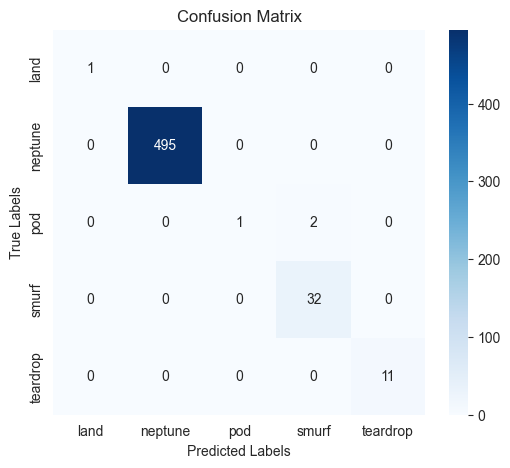

In [44]:
cmdos = confusion_matrix(dosytest, y_pred_dos)
dos_labels = [dos_encoder.classes_[i] for i in range(len(np.unique(dosytest)))]

plt.figure(figsize=(6, 5))
sns.heatmap(cmdos, annot=True, fmt='d', cmap='Blues',xticklabels=dos_labels, yticklabels=dos_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [45]:
print(classification_report(dosytest, y_pred_dos,target_names=dos_labels))

              precision    recall  f1-score   support

        land       1.00      1.00      1.00         1
     neptune       1.00      1.00      1.00       495
         pod       1.00      0.33      0.50         3
       smurf       0.94      1.00      0.97        32
    teardrop       1.00      1.00      1.00        11

    accuracy                           1.00       542
   macro avg       0.99      0.87      0.89       542
weighted avg       1.00      1.00      1.00       542



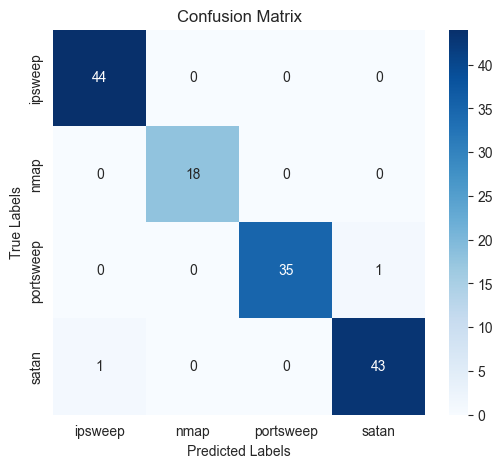

In [46]:
cmscan = confusion_matrix(scanytest, y_pred_scan)
scan_labels = [scan_encoder.classes_[i] for i in range(len(np.unique(scanytest)))]

plt.figure(figsize=(6, 5))
sns.heatmap(cmscan, annot=True, fmt='d', cmap='Blues',xticklabels=scan_labels, yticklabels=scan_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [47]:
print(classification_report(scanytest, y_pred_scan,target_names=scan_labels))

              precision    recall  f1-score   support

     ipsweep       0.98      1.00      0.99        44
        nmap       1.00      1.00      1.00        18
   portsweep       1.00      0.97      0.99        36
       satan       0.98      0.98      0.98        44

    accuracy                           0.99       142
   macro avg       0.99      0.99      0.99       142
weighted avg       0.99      0.99      0.99       142



d:\Scaler\end_to_end\Donor_Choose\project\lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


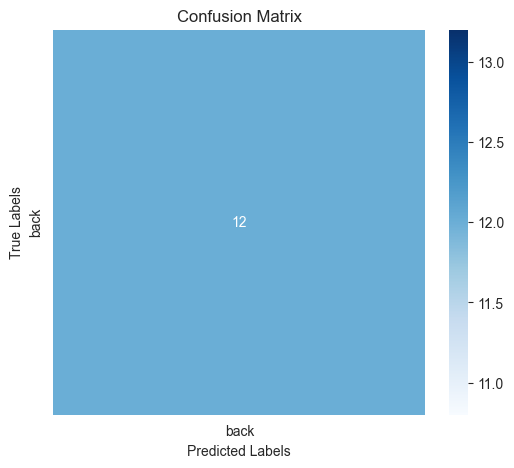

In [48]:
cmsback = confusion_matrix(backdoorytest, y_pred_back)
back_labels = [backdoor_encoder.classes_[i] for i in range(len(np.unique(backdoorytest)))]

plt.figure(figsize=(6, 5))
sns.heatmap(cmsback, annot=True, fmt='d', cmap='Blues',xticklabels=back_labels, yticklabels=back_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [49]:
print(classification_report(backdoorytest, y_pred_back,target_names=back_labels))

              precision    recall  f1-score   support

        back       1.00      1.00      1.00        12

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12



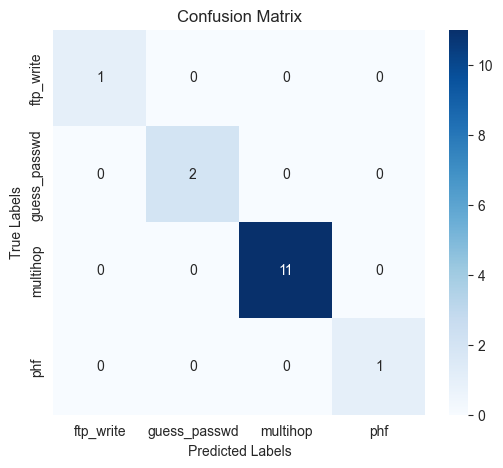

In [50]:
cmaccess = confusion_matrix(accessytest, y_pred_access)
access_labels = [access_encoder.classes_[i] for i in range(len(np.unique(accessytest)))]

plt.figure(figsize=(6, 5))
sns.heatmap(cmaccess, annot=True, fmt='d', cmap='Blues',xticklabels=access_labels,yticklabels=access_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [51]:
print(classification_report(accessytest, y_pred_access,target_names=access_labels))

              precision    recall  f1-score   support

   ftp_write       1.00      1.00      1.00         1
guess_passwd       1.00      1.00      1.00         2
    multihop       1.00      1.00      1.00        11
         phf       1.00      1.00      1.00         1

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



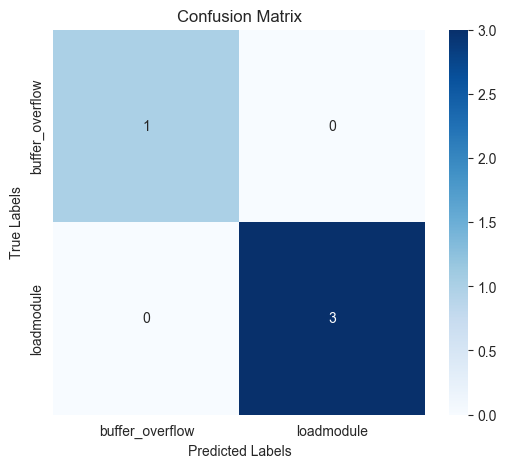

In [52]:
cmexploit = confusion_matrix(exploitytest, y_pred_exploit)
exploit_labels = [exploit_encoder.classes_[i] for i in range(len(np.unique(exploitytest)))]

plt.figure(figsize=(6, 5))
sns.heatmap(cmexploit, annot=True, fmt='d', cmap='Blues',xticklabels=exploit_labels,yticklabels=exploit_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [53]:
df.groupby(['attack_category','attack'])['count'].count()

attack_category  attack         
access           ftp_write              8
                 guess_passwd          53
                 imap                  11
                 multihop               7
                 phf                    4
                 warezclient          890
                 warezmaster           20
backdoor         back                 956
                 spy                    2
dos              land                  18
                 neptune            41214
                 pod                  201
                 smurf               2646
                 teardrop             892
exploit          buffer_overflow       30
                 loadmodule             9
                 perl                   3
                 rootkit               10
normal           normal             67343
scan             ipsweep             3599
                 nmap                1493
                 portsweep           2931
                 satan               3633
N

In [54]:
print(classification_report(exploitytest, y_pred_exploit,target_names=exploit_labels))

                 precision    recall  f1-score   support

buffer_overflow       1.00      1.00      1.00         1
     loadmodule       1.00      1.00      1.00         3

       accuracy                           1.00         4
      macro avg       1.00      1.00      1.00         4
   weighted avg       1.00      1.00      1.00         4



In [55]:
from sklearn.model_selection import RandomizedSearchCV


param_dist = {
    'n_estimators': [50,100, 150,200,300],
    'max_depth': [None, 10, 20,30,40],
    'min_samples_split': [2, 5, 7,10],
    'max_features': ['sqrt', 'log2', None]
}


random_search_dos = RandomizedSearchCV(rfdos, param_distributions=param_dist, 
                                   n_iter=500, cv=5, scoring='accuracy', 
                                   n_jobs=-1, random_state=42)
random_search_dos.fit(dosxtrain, dosytrain)
random_search_dos.best_params_

d:\Scaler\end_to_end\Donor_Choose\project\lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 300 is smaller than n_iter=500. Running 300 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
d:\Scaler\end_to_end\Donor_Choose\project\lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


{'n_estimators': 50,
 'min_samples_split': 2,
 'max_features': 'sqrt',
 'max_depth': None}

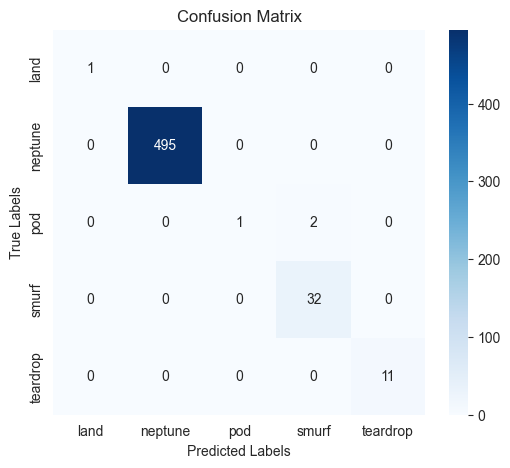

In [56]:
best_dos = random_search_dos.best_estimator_
y_pred_dos_best = best_dos.predict(dosxtest)
cmdosbest = confusion_matrix(dosytest, y_pred_dos_best)

plt.figure(figsize=(6, 5))
sns.heatmap(cmdosbest, annot=True, fmt='d', cmap='Blues',xticklabels=dos_labels, yticklabels=dos_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [57]:
from sklearn.model_selection import RandomizedSearchCV


param_dist = {
    'n_estimators': [50,100, 150,200,300],
    'max_depth': [None, 10, 20,30,40],
    'min_samples_split': [2, 5, 7,10],
    'max_features': ['sqrt', 'log2', None]
}


random_search_scan = RandomizedSearchCV(rfscan, param_distributions=param_dist, 
                                   n_iter=500, cv=5, scoring='accuracy', 
                                   n_jobs=-1, random_state=42)
random_search_scan.fit(scanxtrain, scanytrain)
random_search_scan.best_params_

d:\Scaler\end_to_end\Donor_Choose\project\lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 300 is smaller than n_iter=500. Running 300 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


{'n_estimators': 50,
 'min_samples_split': 2,
 'max_features': 'log2',
 'max_depth': None}

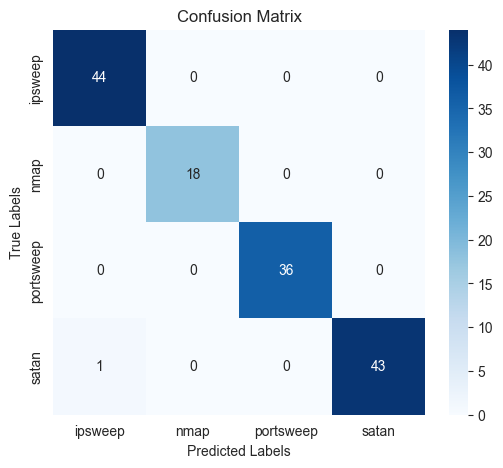

In [58]:
best_scan = random_search_scan.best_estimator_
y_pred_scan_best = best_scan.predict(scanxtest)
cmscanbest = confusion_matrix(scanytest, y_pred_scan_best)

plt.figure(figsize=(6, 5))
sns.heatmap(cmscanbest, annot=True, fmt='d', cmap='Blues',xticklabels=scan_labels, yticklabels=scan_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()